In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("./data/csv_building_structure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [43]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.621060e+05,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,...,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000,762106.000000
mean,2.607514e+11,25.767835,2582.688357,258274.277335,2.087783,1.252058,24.326405,406.672576,16.049372,9.868817,...,0.800271,0.035121,0.015815,0.022961,0.071525,0.258766,0.080482,0.039794,0.016386,0.012026
std,5.801855e+10,5.807555,581.172767,58117.348412,0.655101,1.063275,65.043704,226.779371,5.493878,8.574169,...,0.399797,0.184086,0.124761,0.149780,0.257701,0.437957,0.272039,0.195474,0.126955,0.109001
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df[["age_building", "plinth_area_sq_ft"]].describe()

,age_building,plinth_area_sq_ft
count,762106.000000,762106.000000
mean,24.326405,406.672576
std,65.043704,226.779371
min,0.000000,70.000000
25%,9.000000,280.000000
50%,16.000000,358.000000
75%,27.000000,470.000000
max,999.000000,5000.000000


In [45]:
Q1 = df[["age_building", "plinth_area_sq_ft", "height_ft_pre_eq", "height_ft_post_eq"]].quantile(0.25)
Q3 = df[["age_building", "plinth_area_sq_ft", "height_ft_pre_eq", "height_ft_post_eq"]].quantile(0.75)
IQR = Q3 - Q1

# Define the valid range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[((df[["age_building", "plinth_area_sq_ft", "height_ft_pre_eq", "height_ft_post_eq"]] >= lower_bound) & (df[["age_building", "plinth_area_sq_ft", "height_ft_pre_eq", "height_ft_post_eq"]] <= upper_bound)).all(axis=1)]

In [46]:
df.dropna(inplace=True)
df["damage_grade"].str[-1].astype(int)

0         3
1         5
2         2
3         2
4         1
         ..
762099    5
762100    1
762102    5
762103    5
762104    5
Name: damage_grade, Length: 670307, dtype: int32

In [47]:
df["collapsed"] = df["height_ft_pre_eq"]-df["height_ft_post_eq"] > df["height_ft_pre_eq"] * 0.95
df["collapsed"]

0         False
1         False
2         False
3         False
4         False
          ...  
762099     True
762100    False
762102     True
762103     True
762104     True
Name: collapsed, Length: 670307, dtype: bool

<img src="image-20240413-195757.png" width="" align="" />

In [48]:
df["collapsed"].value_counts()

False    434212
True     236095
Name: collapsed, dtype: int64

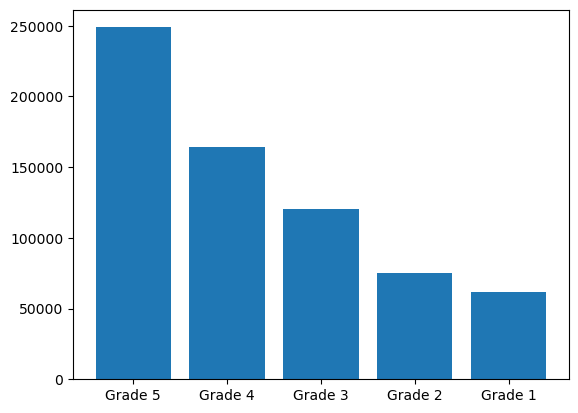

In [49]:
fig, ax = plt.subplots()

grade_counts = df["damage_grade"].value_counts()

ax.bar(grade_counts.index, grade_counts.values);

### Correlation Analysis

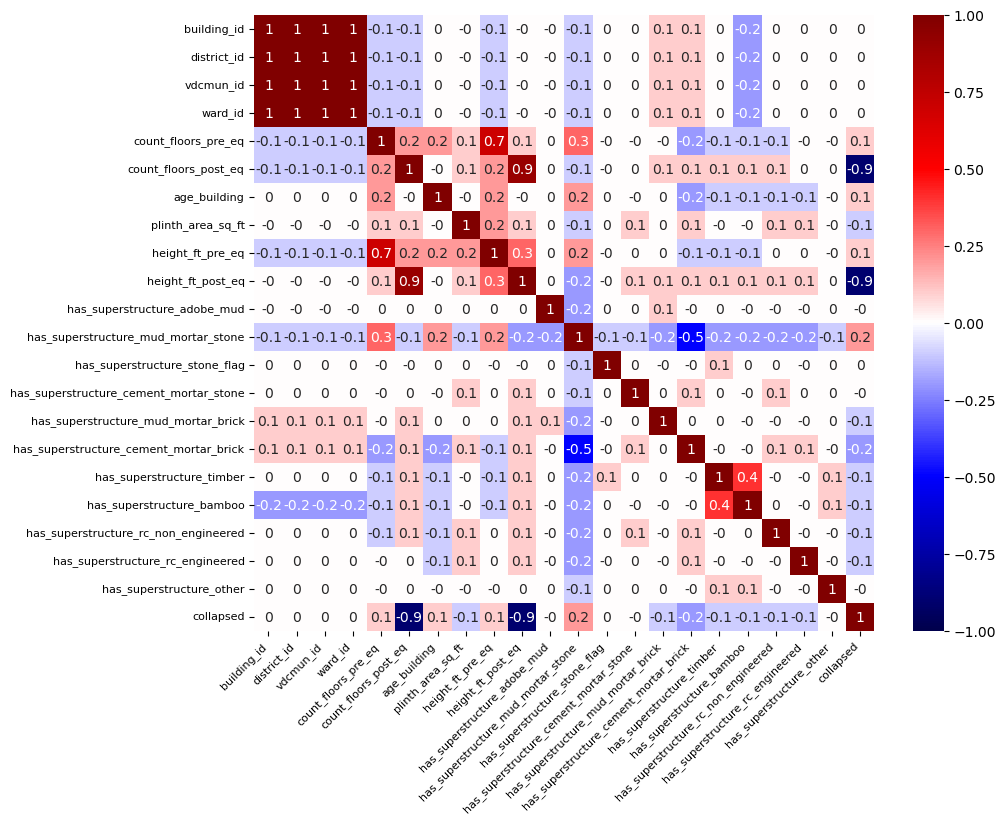

In [50]:
corr = df.corr(numeric_only=True)
corr = corr.round(1)
plt.figure(figsize=(10, 8))
sns_heatmap = sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1)
sns_heatmap.tick_params(axis='both', which='major', labelsize=8)
sns_heatmap.set_xticklabels(sns_heatmap.get_xticklabels(), ha='right')
plt.xticks(rotation=45)
plt.show()

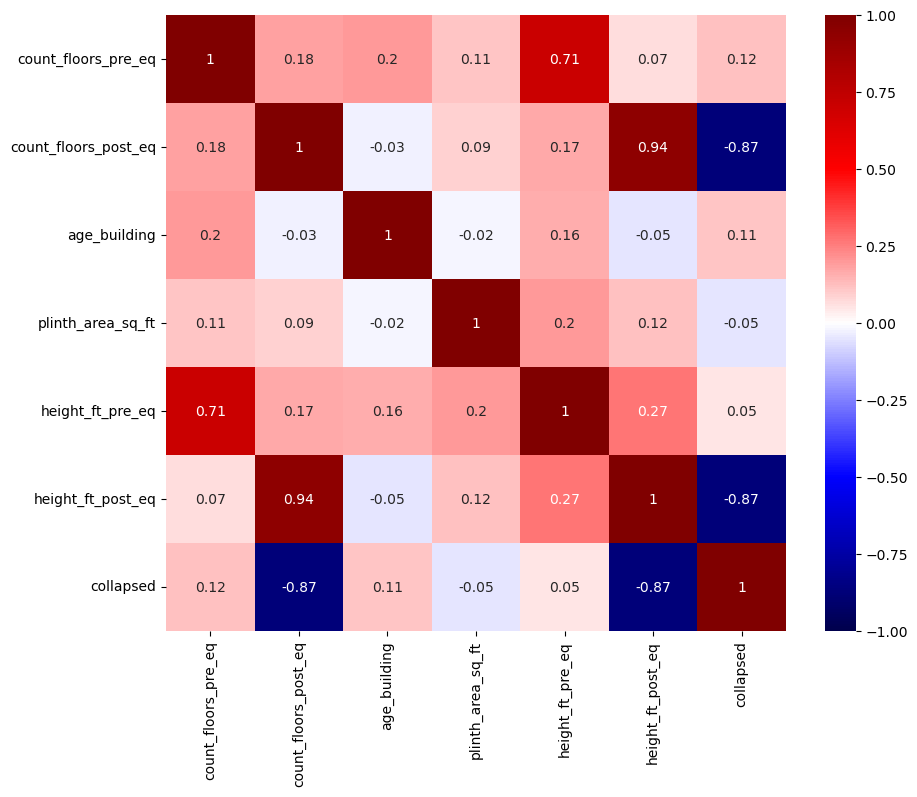

In [51]:
df_new = df.drop(columns=["building_id", "vdcmun_id", "ward_id", "count_floors_post_eq", "height_ft_post_eq", 
 "other_floor_type", "condition_post_eq", "damage_grade", "technical_solution_proposed"])
df_numeric_only = df[["count_floors_pre_eq", "count_floors_post_eq", "age_building", "plinth_area_sq_ft",
                        "height_ft_pre_eq", "height_ft_post_eq", "collapsed"]]
corr = df_numeric_only.corr(numeric_only=True)
corr = corr.round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1)
plt.show()

In [52]:
X = pd.get_dummies(df_new.drop(columns=["plinth_area_sq_ft", "age_building", "collapsed"]), columns=['district_id', 'land_surface_condition', 'position',
                                                                'foundation_type', 'roof_type', 
                                 'ground_floor_type', 'plan_configuration'])
y = df_new["collapsed"]
chi2_stats, p_values = chi2(X, y)

chi2_stats_sorted = sorted(zip(X.columns, chi2_stats), key=lambda x: x[1], reverse=True)

for col, c in chi2_stats_sorted:
    print(f"{col:55} {c:20}")

district_id_23                                             66164.42885895741
district_id_31                                             23576.03699101072
ground_floor_type_RC                                       18465.56459266617
has_superstructure_cement_mortar_brick                    17189.533635139906
foundation_type_Bamboo/Timber                             17042.594726837575
district_id_20                                             15657.19041896375
district_id_22                                            11375.170381828068
roof_type_RCC/RB/RBC                                      10056.505045969992
district_id_12                                             7749.940917456099
foundation_type_RC                                        7362.4080444044175
district_id_28                                            6803.4195205676315
has_superstructure_mud_mortar_stone                       6757.7621544099675
district_id_21                                             6627.041024340349

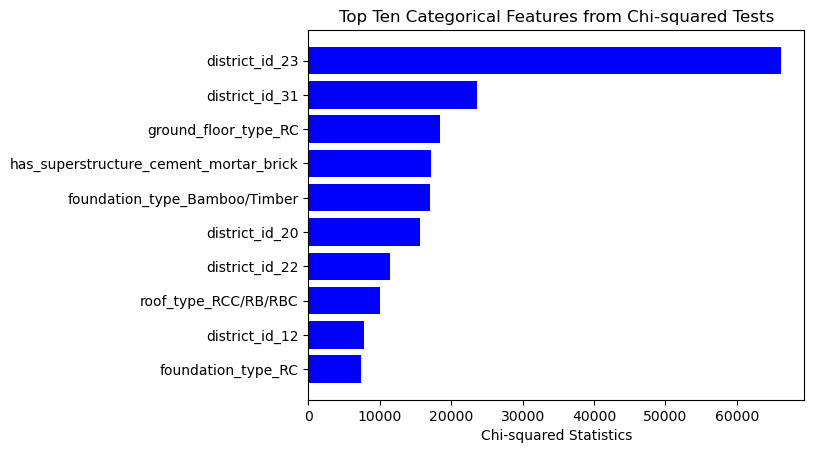

In [66]:
plt.title('Top Ten Categorical Features from Chi-squared Tests')

plt.barh([chi2_stats_sorted[i][0] for i in range(10)][::-1], [chi2_stats_sorted[i][1] for i in range(10)][::-1], color="b", align="center")

# plt.xscale("log")
plt.xlabel("Chi-squared Statistics")
plt.show()

### Simple Logistic Regression

In [54]:
# All features that makes sense
# X = df.drop(columns=["building_id", "vdcmun_id", "ward_id", "count_floors_post_eq", "height_ft_post_eq", 
# "other_floor_type", "position", "condition_post_eq", "damage_grade", "technical_solution_proposed"], inplace=False)
# X = pd.get_dummies(X, columns=['district_id', 'land_surface_condition', 'foundation_type', 'roof_type', 
#                                 'ground_floor_type', 'plan_configuration'])
X = df[["plinth_area_sq_ft", "age_building", "district_id", "foundation_type", "ground_floor_type", 
        "has_superstructure_cement_mortar_brick"]]
X = pd.get_dummies(X, columns=["district_id", "foundation_type", "ground_floor_type"], drop_first=True)

y = df["height_ft_pre_eq"] - df["height_ft_post_eq"] > df["height_ft_pre_eq"] * 0.95
X

,plinth_area_sq_ft,age_building,has_superstructure_cement_mortar_brick,district_id_20,district_id_21,district_id_22,district_id_23,district_id_24,district_id_28,district_id_29,...,district_id_31,district_id_36,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber
0,288,9,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,364,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,384,20,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,312,20,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,308,30,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762099,513,9,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
762100,513,13,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
762102,342,35,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
762103,342,35,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [56]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [57]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7427


In [58]:
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

AUC: 0.7935


In [59]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [60]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7427


In [61]:
y_scores = rf.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, y_scores)

rf_roc_auc = auc(rf_fpr, rf_tpr)
print(f"AUC: {rf_roc_auc:.4f}")

AUC: 0.7549


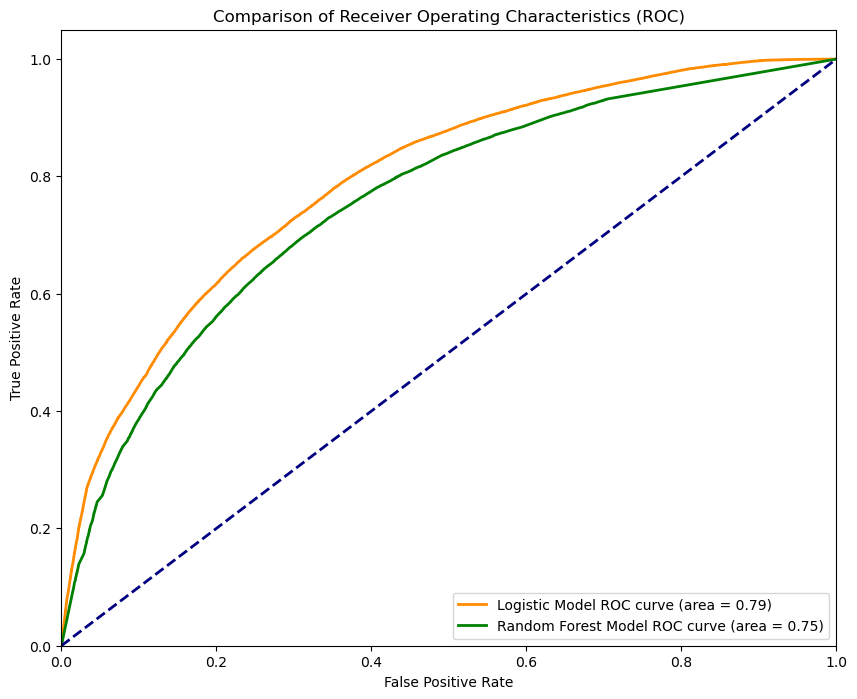

In [62]:
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Model ROC curve (area = %0.2f)' % roc_auc)
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label='Random Forest Model ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of Receiver Operating Characteristics (ROC)')
plt.legend(loc="lower right")

plt.show()


In [63]:
from sklearn.model_selection import cross_val_score

# Cross-validate AUC scores
cv_auc_logistic = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
cv_auc_rf = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

print(f"Logistic Regression CV AUC Scores: {cv_auc_logistic}")
print(f"Random Forest CV AUC Scores: {cv_auc_rf}")
print(f"Average Logistic Regression CV AUC: {np.mean(cv_auc_logistic):.2f} ± {np.std(cv_auc_logistic):.2f}")
print(f"Average Random Forest CV AUC: {np.mean(cv_auc_rf):.2f} ± {np.std(cv_auc_rf):.2f}")

Logistic Regression CV AUC Scores: [0.50228323 0.73725764 0.60720481 0.41573353 0.78236558]
Random Forest CV AUC Scores: [0.54752538 0.53238658 0.60661192 0.37097556 0.65262202]
Average Logistic Regression CV AUC: 0.61 ± 0.14
Average Random Forest CV AUC: 0.54 ± 0.10


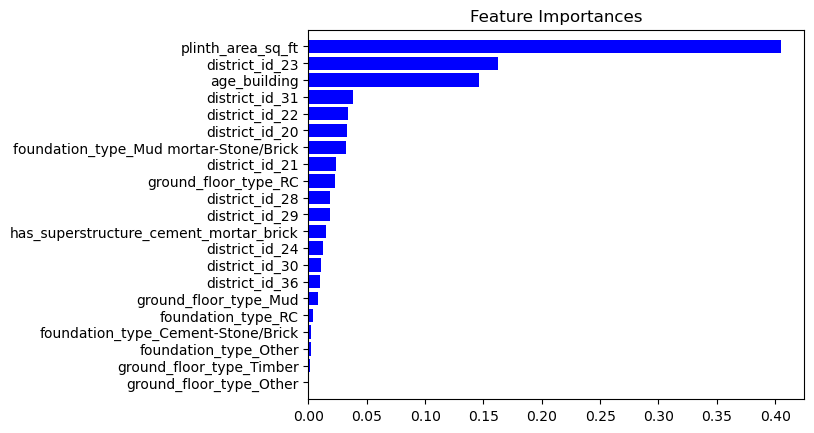

In [64]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title('Feature Importances')

plt.barh(range(X_train.shape[1]), importances[indices][::-1], color="b", align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices][::-1])
plt.ylim([-1, X_train.shape[1]])
plt.show()

### District ID-Name Mapping

In [65]:
district_df = pd.read_csv("ward_vdcmun_district_name_mapping.csv")
district_df.drop_duplicates(subset=['district_id', 'district_name'], inplace=True)
district_df[['district_id', 'district_name']]

,district_id,district_name
0,12,Okhaldhunga
75,20,Sindhuli
154,21,Ramechhap
218,22,Dolakha
292,23,Sindhupalchok
397,24,Kavrepalanchok
532,28,Nuwakot
621,29,Rasuwa
648,30,Dhading
752,31,Makwanpur
